# A: Studying Higgs Boson Analysis. Signal and Background

Sloping background as in real experiment.
This program runs in about 4.946 seconds (Windows 10, 16 GB)

## Part 1 The Background

This file contains the code for the unit "The Elusive Mr. Higgs".It explains the experiment with the Higgs signal
and background signal under different settings. In this part we look at the Background.

In [1]:
try:
    from cloudmesh.common.StopWatch import StopWatch
except:  # noqa: E722
    ! pip install cloudmesh-common
    from cloudmesh.common.StopWatch import StopWatch

In [2]:
StopWatch.start("total")
StopWatch.progress(0)
StopWatch.start("import")
import numpy as np    # noqa: E402
import matplotlib.pyplot as plt    # noqa: E402
import pylab    # noqa: E402
import os
StopWatch.stop("import")

# cloudmesh status=running progress=0 pid=8004


In [3]:
def save(file):
  name = os.path.basename(file).replace(".py", "")
  cwd = os.getcwd()
  plt.savefig(f'{cwd}/images/{name}.png',dpi=300)
  plt.savefig(f'{cwd}/images/{name}.pdf')
  plt.savefig(f'{cwd}/images/{name}.svg')
  plt.show()

In [ ]:
# Create the background for the setup and plot the same
n = 42000

StopWatch.start(f"create-randomdata-{n}")

# A random array have 42000 elements according to the uniform distribution.
# The numbers generated will between 0 and 1
testrand = np.random.rand(n)

# Generating a uniform background(base) between a 110 GeV and 140 GeV
Base = 110 + 30 * np.random.rand(n)

# To create a boolean index which has True for 100% samples at 110GeV;
# This percentage reduces linearly as the value for background increases and
# has ture for 50% samples as 140 GeV
index = (1.0 - 0.5 * (Base-110)/30) > testrand

# This generates a sloping background. Here the values in base corresponding the
# True values in "index" are retained rest are discarded. So this has a
# distribution as described above
sloping = Base[index]
StopWatch.stop(f"create-randomdata-{n}")

# Plotting - Sloping Background with title Sloping

StopWatch.start("plot-sloping")
plt.figure("Sloping")
plt.hist(sloping, bins=15, range=(110, 140), color="green")
plt.title("Sloping Background from 42000 events", backgroundcolor="white")
save("sloping")
StopWatch.stop("plot-sloping")

## Part 2 The Higgs Signal

Create a Gaussian Higgs signal(Gaussian signal is what we will get due to error in measurement). The width
of the Gaussian indicated the extent of measurement error. This signal has 300 samples.
We compare two histogram choices -- 2 GeV or 0.5 GeV  -- each for two measurement errors 0.5 and 2 GeV.
In the next part Part 3, we combine signal and background

FileNotFoundError: [Errno 2] No such file or directory: '/filepath/higgsalone-1.png'

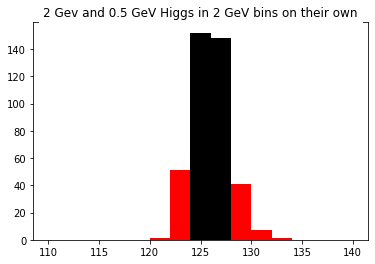

In [4]:
StopWatch.start("create-gaussian-signal")

# The signal is centered at 126 GeV and has a width of 2.
gauss = 2 * np.random.randn(300) + 126
# A signal with centered at 126 GeV and width of 0.5 (Error in measurement is less than previous signal"
narrowGauss = 0.5 * np.random.randn(300) + 126

StopWatch.stop("create-gaussian-signal")
# Plotting - The Higgs Signal with width 2.0 with title "HiggsAlone"
StopWatch.start("plot-higgsalone")
plt.figure("HiggsAlone-1")
plt.hist(gauss, bins=15, range=(110, 140), color="red")
plt.hist(narrowGauss, bins=15, range=(110, 140), color="black")
plt.title("2 Gev and 0.5 GeV Higgs in 2 GeV bins on their own", backgroundcolor="white")
save("higgsalone-1")
plt.figure("HiggsAlone-2")
plt.hist(gauss, bins=60, range=(110, 140), color="red")
plt.hist(narrowGauss, bins=60, range=(110, 140), color="black")
plt.title("2 Gev and 0.5 GeV Higgs in 0.5 GeV bins on their own", backgroundcolor="white")
save("higgsalone-2")
StopWatch.stop("plot-higgsalone")

## Part 3 Higgs plus Background

Create the actual Signal by combining the Higgs signals(Gaussian shape) and the sloping background signal.
We look at 2 different widths for the Higgs

Note Higgs width is entirely due to measurement error. The Higgs has a natural width as it is NOT stable
but rather decays. This natural width can only be estimated at present from observed decay rate and it is
< 10 MeV - a factor of more than 100 lower than observed width.

As width coming from measurement errors, it is expected to be Gaussian. It would be a different shape
(Breit Wigner) if coming from its Quantum properties.

The three plots fix the measurement with at 0.5 GeV and vary your choice as a data analyst; namely the bin
size of histogram. The 0.5 GeV bin size seems best.

In [ ]:
StopWatch.start("concat-sloping-gauss")
total = np.concatenate((sloping, gauss))                # Accumalate the sloping Background and gauss(width = 2.0)
narrowTotal = np.concatenate((sloping, narrowGauss))    # Accumalate the sloping background and narrowGauss(width = 0.5)
StopWatch.stop("concat-sloping-gauss")
# Plotting - The 3 kinds of signals(Sloping Background, Higgs Signal, Combined Signal) where Higgs Signal has width 0.5.
# The plot has 15 bins(each bin represents 2 GeV). Plot title is "Total Narrow Higgs"
StopWatch.start("plot-narrow-higgs")
plt.figure("Total Narrow Higgs")
plt.hist(narrowTotal, bins=15, range=(110, 140), alpha=0.5, color="blue")   # Total Signal
plt.hist(sloping, bins=15, range=(110, 140), alpha=0.5, color="green")      # Sloping Signal.
plt.hist(narrowGauss, bins=15, range=(110, 140), alpha=0.5, color="red")    # Only the Higgs Signal.
plt.title("0.5 Gev Higgs in 2 GeV bins with Sloping Background", backgroundcolor="white")
save("total-narrow-higgs")
StopWatch.progress(25)

# Plotting - The 3 kinds of signals(Sloping Background, Higgs Signal, Combined Signal) where Higgs Signal has width 0.5.
# The plot has 30 bins(each bin represents 1GeV). Plot title is "Total Narrow Higgs Bin 1 GeV"
plt.figure("Total Narrow Higgs Bin 1 GeV")
plt.hist(narrowTotal, bins=30, range=(110, 140), alpha=0.5, color="blue")    # Total Signal
plt.hist(sloping, bins=30, range=(110, 140), alpha=0.5, color="green")       # Sloping Signal.
plt.hist(narrowGauss, bins=30, range=(110, 140), alpha=0.5, color="red")     # Only the Higgs Signal.
plt.title("0.5 Gev Higgs in 1 GeV bins with Sloping Background", backgroundcolor="white")
save("total-narrow-higgs-bin-1gev")

# Plotting - The 3 kinds of signals(Sloping Background, Higgs Signal, Combined Signal) where Higgs Signal has width 0.5.
# The plot has 60 bins(each bin represents 0.5GeV). Plot title is "Total Narrow Higgs Bin 0.5 GeV"
plt.figure("Total Narrow Higgs Bin 0.5 GeV")
plt.hist(narrowTotal, bins=60, range=(110, 140), alpha=0.5, color="blue")   # Total Signal
plt.hist(sloping, bins=60, range=(110, 140), alpha=0.5, color="green")     # Sloping Signal.
plt.hist(narrowGauss, bins=60, range=(110, 140), alpha=0.5, color="red")   # Only the Higgs Signal.
plt.title("0.5 Gev Higgs in 0.5 GeV bins with Sloping Background", backgroundcolor="white")
save("total-narrow-higgs-bin-0.5gev")
StopWatch.stop("plot-narrow-higgs")

Here we look at a 2 GeV wide Higgs Boson. It does not stand out!

In [ ]:
# Plotting - The 3 kinds of signals(Sloping Background, Higgs Signal, Combined Signal) signal where Higgs Signal
# has width 2.0. The plot has 15 bins(each bin represents 2GeV). Plot title is "Total Wide Higgs Bin 2 GeV"
StopWatch.start("plot-wide-higgs")
plt.figure("Total Wide Higgs Bin 2 GeV")
# We store the histogram values(number of members per bin) and bin edges.
values, binedges, junk=plt.hist(total, bins=15, range=(110, 140), alpha=0.5, color="blue")           # Total Signal.
plt.hist(sloping, bins=15, range=(110, 140), alpha=0.5, color="green")                               # Sloping Signal.
plt.hist(gauss, bins=15, range=(110, 140), alpha=0.5, color="red")                                   # Only the Higgs Signal.
plt.title("2 Gev Higgs in 2 GeV bins with Sloping Background", backgroundcolor="white")
save("wide-higgs")
StopWatch.stop("plot-wide-higgs")

StopWatch.progress(50)

## Part 4 Error Estimates

Computing the bin Centers and Errors where latter come from rule for counting experiments that an
observation of N events has an error sqrt(N)/ The error bars are quite small as 2500 has error 50
which is 2%). They are bigger at the end when we reduce total number of events.

In [ ]:
StopWatch.start("compute-error")
centers = 0.5 * (binedges[1:] + binedges[:-1])                # Computing bin center as the average of its 2 bin-edges.
errors = np.sqrt(values)                                      # Computing expected error as the square root of values.
StopWatch.stop("compute-error")
# Plotting - The 3 kinds of signals(Sloping Background, Higgs Signal, Combined Signal) and expected errors where Higgs Signal has
# width 2.0. The plot has 60 bins (each bin represents 0.5GeV). Plot title is "Total Wide Higgs Bin 2 GeV with errors"
StopWatch.start("plot-wide-higgs-error")
plt.figure("Total Wide Higgs Bin 2 GeV with errors")
plt.hist(total, bins=15, range=(110, 140), alpha=0.5, color="blue")                                 # The total signal
plt.hist(sloping, bins=15, range=(110, 140), alpha=0.5, color="green")                              # Sloping Signal.
plt.hist(gauss, bins=15, range=(110, 140), alpha=0.5, color="red")                                  # Only the Higgs Signal.
plt.errorbar(centers, values, yerr=errors, ls='None', marker='x', color='black', markersize=6.0)    # The error bar
plt.title("2 Gev Higgs in 2 GeV bins with Sloping Background + Errors", backgroundcolor="white")
save("wide-higgs-error")
StopWatch.stop("plot-wide-higgs-error")

## Part 5 A Larger Signal

Creating a Higgs Signal with 30000 elements. If we use this against the original backgrounds, we study
the effect of making the Higgs 100 times more likely(The original number of Higgs samples was 300).

In [ ]:
n = 30000
print('Higgs on its own with no background')
StopWatch.start(f"create-higgs-signal-{n}")
gaussbig = 2 * np.random.randn(n) +126                  # Creating a Higgs Signal with 30000 elements and width of 2.0
gaussnarrowbig = 0.5 * np.random.randn(n) +126          # Creating a Higgs Signal with 30000 elements and width of 0.5
                                                            # (less error in measurement than previous case)
totalbig = np.concatenate((sloping, gaussbig))
StopWatch.stop(f"create-higgs-signal-{n}")
# Plotting - The Pure Higgs Signals with weight 0.5 and 2. The signal with 30,000 elements is used. Plot has 60
# bins (each of size .5GeV). Plot title is "30000 Higgs in 0.5 GeV bins"
StopWatch.start(f"plot-higgs-{n}")
plt.figure("30000 Higgs in 0.5 GeV bins")
plt.hist(gaussnarrowbig, bins=60, range=(110, 140), alpha=0.5) #Higgs signal
plt.hist(gaussbig, bins=60, range=(110, 140), alpha=0.5)
plt.title("30000 Narrow and Wide Higgs in 0.5 GeV bins", backgroundcolor="white")
save(f"higgs-{n}")
StopWatch.stop(f"plot-higgs-{n}")

print('\nLarge Higgs signal on original size background')

# Plotting - The 3 kinds of signals(Sloping Background, Higgs Signal, Combined Signal) where Higgs Signal has width 2.0 and is 100
# times more frequent. The plot has 15 bins (each bin represents 2GeV). Plot title is "Total Wide Higgs Bin 2 GeV 100 times Higgs"
StopWatch.start("plot-sloping-higgs-combined")
plt.figure("Total Wide Higgs Bin 2 GeV 100 times Higgs")
plt.hist(totalbig, bins=15, range=(110, 140), alpha=0.5)      # Total signal with Higgs being 100 times more frequent
plt.hist(sloping, bins=15, range=(110, 140), alpha=0.5)       # sloping background
plt.hist(gaussbig, bins=15, range=(110, 140), alpha=0.5)      # Higgs signal with 30,000 elements
plt.title("Total Wide Higgs Bin 2 GeV 100 times Higgs", backgroundcolor="white")
save("sloping-higgs-combined")
StopWatch.stop("plot-sloping-higgs-combined")
StopWatch.progress(75)

## Part 6 A Small Experiment (1% original)

Creating a setup with 1% data. Now the background has initially 420 elements.
This data fluctuates too much and you won't see any signal from Higgs (only 3 particles expected)

In [ ]:
StopWatch.start("small-experiment-1%")
testrand420 = np.random.rand(420)                               # Creating random array with 420 elements.
Base420 = 110 + 30 * np.random.rand(420)                        # Creating Background with 420 events
index420 = (1.0 - 0.5 * (Base420-110)/30) > testrand420         # Creating index to get the sloping background.
Sloping420 = Base420[index420]                                  # Creating Sloping Background
# Plot - Plotting the 1% background data. Plot has 15 bins(each 2GeV). Plot title is "Sloping 420 Events"
plt.figure("Sloping 420 Events")
plt.hist(Sloping420, bins=15, range=(110, 140))
plt.title("Sloping Background from 420 events (1%)", backgroundcolor="white")
save("small-experiment-1")
StopWatch.stop("small-experiment-1%")

## Part 7 Medium Size Experiment

Creating setup with 10% data(4200 elements for background, 30 elements for Higgs signal) and computing the errors.

In [ ]:
StopWatch.start("medium-experiment-10%")
testrand4200 = np.random.rand(4200)                             # Creating random array with 4200 elements.
Base4200 = 110 + 30 * np.random.rand(4200)                      # Creating Background with 4200 events
index4200 = (1.0 - 0.5 * (Base4200-110)/30) > testrand4200      # Creating index to get the sloping background.
Sloping4200 = Base4200[index4200]                               # Creating Sloping Background
gauss30 = 2 * np.random.randn(30) + 126                          # Creating Higgs signal with width 2.0 and center at 126GeV
total10percent = np.concatenate((Sloping4200, gauss30))         # Combining the Higgs signal and sloping background
# Plotting - The 3 kinds of signals(Sloping Background, Higgs Signal, Combined Signal) where Higgs Signal has width 2.0 for 10%
# of data. The plot has 15 bins(each bin represents 2GeV). Plot tile is "Total Sloping Background 10% Data"
plt.figure("Total Sloping Background 10% Data")
values10percent, binedges10percent, junk = plt.hist(total10percent, bins=15, range=(110,140), alpha=0.5, color="blue")
# Total signal and storing the number values/bin and the bin edges.
plt.hist(Sloping4200, bins=15, range=(110, 140), alpha=0.5, color="green")                   # Sloping background
plt.hist(gauss30, bins=15, range=(110, 140), alpha=0.5, color="red")                          # Higgs Signal(width 2.0)
plt.title("Total with Sloping Background from 4200 events (10%)", backgroundcolor="white")
save("medium-sloping-10")

# Plotting - The 3 kinds of signals(Sloping Background, Higgs Signal, Combined Signal) and the error where Higgs Signal has width
# 2.0 for 10% of data. The plot has 15 bins(each bin represents 2GeV). Plot title is "Total Sloping Background 10% Data with errors"
plt.figure("Total Sloping Background 10% Data with errors")
centers10percent = 0.5 * (binedges10percent[1:] + binedges10percent[:-1])           # Computing the bin centers
errors10percent = np.sqrt(values10percent)                                          # Computing expected errors
plt.hist(total10percent, bins=15, range=(110, 140), alpha=0.5, color="blue")       # Plotting the total signal
plt.hist(Sloping4200, bins=15, range=(110, 140), alpha=0.5, color="green")         # Plotting the sloping background
plt.hist(gauss30, bins=15, range=(110, 140), alpha=0.5, color="red")               # Plotting the Higgs Signal
plt.errorbar(centers10percent, values10percent, yerr=errors10percent, ls='None', marker='x', color='black', markersize=6.0)
# Plotting the error
plt.title("Total with Sloping Background from 4200 events (10%) + Errors", backgroundcolor="white")
save("medium-sloping-10-4200")
StopWatch.stop("medium-experiment-10%")
StopWatch.stop("total")
StopWatch.progress(100)
StopWatch.benchmark()